# LSTM

# LSTM으로 로이터 뉴스 카테고리 분류하기

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters  # 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋 분리
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

category = np.max(y_train) + 1
print(category, "카테고리")
print(len(X_train), "학습용 뉴스 기사")
print(len(X_test), "테스트용 뉴스 기사")
print(X_train[0])

2025-04-27 19:25:06.573443: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-27 19:25:06.582222: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745749506.591577  680685 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745749506.595303  680685 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745749506.606269  680685 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [2]:
# 단어의 수를 맞춤
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

# 원-핫 인코딩 처리
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 모델의 구조를 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation="tanh"))
model.add(Dense(46, activation="softmax"))

# 모델의 실행 옵션
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# 학습의 조기 중단
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=5)

# 모델을 실행
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

# 테스트 정확도를 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/200


W0000 00:00:1745749532.405169  680685 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


450/450 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.4002 - loss: 2.4252 - val_accuracy: 0.5352 - val_loss: 1.7935
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.5257 - loss: 1.8023 - val_accuracy: 0.5476 - val_loss: 1.7228
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.5619 - loss: 1.6914 - val_accuracy: 0.6042 - val_loss: 1.5584
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.6151 - loss: 1.5230 - val_accuracy: 0.6425 - val_loss: 1.4320
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.6753 - loss: 1.2926 - val_accuracy: 0.6549 - val_loss: 1.3507
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.7044 - loss: 1.1613 - val_accuracy: 0.6790 - val_loss: 1.2555
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.7279 - loss: 1.0628 - val_accuracy: 0.6977 - val_loss: 1.1916
Epoch 8/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.7587 - loss: 0.9610 - val_

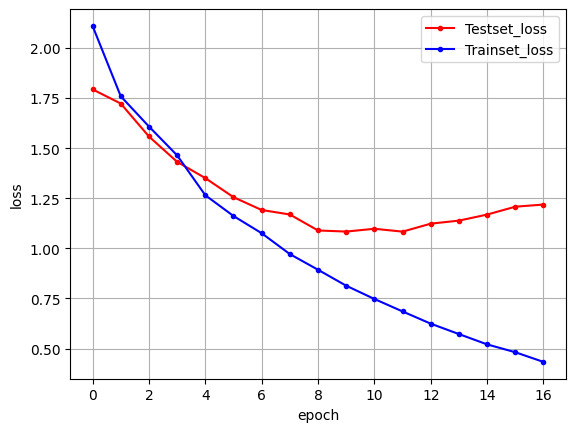

In [3]:
# 학습셋과 테스트셋의 오차 저장
y_vloss = history.history["val_loss"]
y_loss = history.history["loss"]

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker=".", c="blue", label="Trainset_loss")

# 그래프에 그리드와 레이블 출력
plt.legend(loc="upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# LSTM과 CNN으로 영화 리뷰 분류

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋 분리
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# 단어의 수를 맞추어 줌
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

# 모델의 구조를 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding="valid", activation="relu", strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.summary()

2025-04-27 19:34:43.565001: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-27 19:34:43.575567: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745750083.586687  690569 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745750083.589503  690569 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745750083.598682  690569 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [2]:
# 모델의 실행 옵션
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# 학습의 조기 중단
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=3)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

# 테스트 정확도를 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100


I0000 00:00:1745750097.642994  690755 cuda_dnn.cc:529] Loaded cuDNN version 90300


469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.6836 - loss: 0.5473 - val_accuracy: 0.8763 - val_loss: 0.2864
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9056 - loss: 0.2428 - val_accuracy: 0.8922 - val_loss: 0.2722
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9296 - loss: 0.1885 - val_accuracy: 0.8925 - val_loss: 0.2657
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9477 - loss: 0.1468 - val_accuracy: 0.8915 - val_loss: 0.2859
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9603 - loss: 0.1151 - val_accuracy: 0.8846 - val_loss: 0.2955
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9696 - loss: 0.0886 - val_accuracy: 0.8890 - val_loss: 0.3355
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8745 - loss: 0.3768

 Test Accuracy: 0.8767


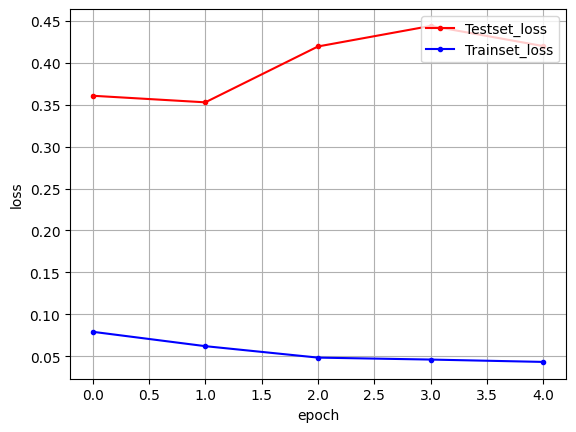

In [4]:
# 학습셋과 테스트셋의 오차를 저장합니다.
y_vloss = history.history["val_loss"]
y_loss = history.history["loss"]

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker=".", c="blue", label="Trainset_loss")

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc="upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# 어텐션을 사용한 신경망

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from attention import Attention

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋 분리
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# 단어의 수를 맞추기
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

# 모델의 구조를 설정
model = Sequential()
model.add(Embedding(5000, 500))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))

# 모델의 실행 옵션
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# 학습의 조기 중단을 설정
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=3)

# 모델을 실행
history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

# 테스트 정확도를 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100


TypeError: Exception encountered when calling Sequential.call().

[1mAttention.__call__() got multiple values for argument 'training'[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(40, 500), dtype=int32)
  • training=True
  • mask=None

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Embedding, LSTM, Attention, GlobalAveragePooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

# 데이터셋 불러오기
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

maxlen = 500
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

# 모델 시작
inputs = Input(shape=(maxlen,))
x = Embedding(5000, 500)(inputs)
x = Dropout(0.5)(x)
x = LSTM(64, return_sequences=True)(x)

# Attention 레이어
attn_out = Attention()([x, x])  # query=x, value=x
x = Dropout(0.5)(attn_out)

x = GlobalAveragePooling1D()(x)  # 시퀀스 축소
outputs = Dense(1, activation="sigmoid")(x)

model = Model(inputs, outputs)

# 컴파일
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# 조기 종료
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=3)

# 학습
history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

# 평가
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100


I0000 00:00:1745750899.620584  695974 cuda_dnn.cc:529] Loaded cuDNN version 90501


625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.6894 - loss: 0.5463 - val_accuracy: 0.8886 - val_loss: 0.2792
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.9074 - loss: 0.2368 - val_accuracy: 0.8947 - val_loss: 0.2547
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.9438 - loss: 0.1583 - val_accuracy: 0.8902 - val_loss: 0.2687
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.9625 - loss: 0.1122 - val_accuracy: 0.8876 - val_loss: 0.2981
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.9730 - loss: 0.0801 - val_accuracy: 0.8811 - val_loss: 0.3467
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8794 - loss: 0.3489

 Test Accuracy: 0.8811


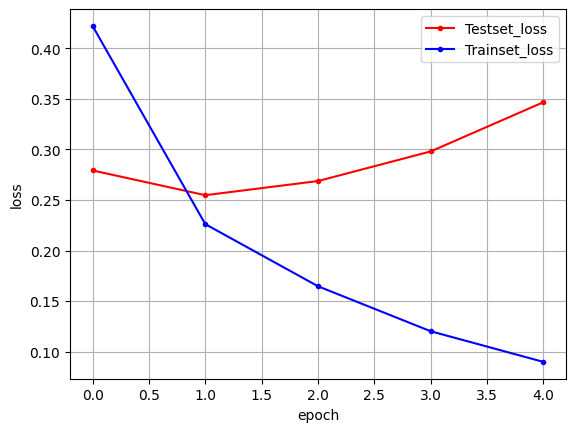

In [6]:
# 학습셋과 테스트셋의 오차를 저장
y_vloss = history.history["val_loss"]
y_loss = history.history["loss"]

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker=".", c="blue", label="Trainset_loss")

plt.legend(loc="upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()